# Sparse Hebbian Learning: basics

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [4]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10


/Users/lolo/pool/libs/scikit-learn-sparsenet/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [5]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose, eta=.1, n_image=10, n_iter=100)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Hdn_objn190.jpg, Bda_room141.jpg, Fdn_bea2.jpg, Fdn_land867.jpg, Hdn_objn29.jpg, Mdn_N347015.jpg, Fdn_open13.jpg, Fda_A244041.jpg, Fda_art772.jpg, Fda_A805078.jpg, 
Data is of shape : (1000, 144)done in 0.49s.

In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  1.62832710278e-18
average energy of patches =  1.0
std of the average of individual patches =  1.35631315285e-17


Extracting data...Fdn_nat10.jpg, Fdn_nat297.jpg, Bda_room451.jpg, Mdn_N295008.jpg, Mda_art843.jpg, Fdn_land867.jpg, Hdn_objn129.jpg, Fdn_open14.jpg, Mda_gre90.jpg, Mda_art669.jpg, 
Data is of shape : (1000, 144)done in 0.47s.Learning the dictionary... Training on 1000 patches... Iteration   0 /   10 (elapsed time:   0s,  0.0mn)
Norm  1.0 1.0 11
Gain  1.0 1.0 0
Iteration   1 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.993487871628 1.03276546044 104
Gain  0.999974968808 1.00006466945 154
Iteration   2 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.991248394861 1.05233471452 121
Gain  0.9999535234 1.00016361593 18
Iteration   3 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.996536149748 1.04444915551 140
Gain  0.99991885533 1.00039055554 18
Iteration   4 /   10 (elapsed time:   0s,  0.0mn)
Norm  1.00244035128 1.0460757449 133
Gain  0.999889152367 1.00044516771 18
Iteration   5 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.977602138877 1.06192494735 65
Gain

/Users/lolo/pool/libs/scikit-learn-sparsenet/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


done in 1.20s.


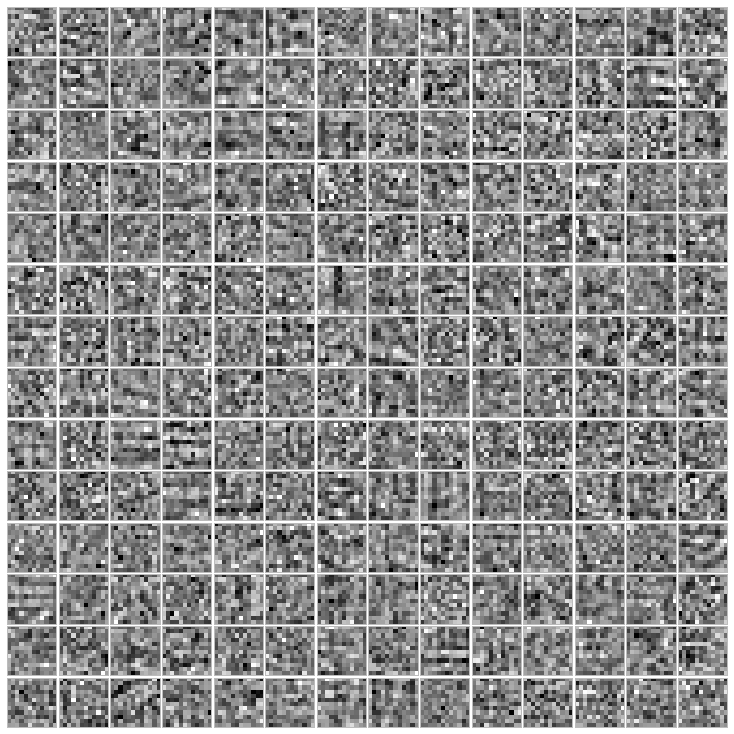

In [7]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)
patches = shl.code(data, dico)

In [8]:
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  -0.000874066101015
average energy of patches =  0.715106180144
std of the average of individual patches =  0.0088536491944


In [9]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of patches, size of patches =  (1000, 196)
average of patches =  9.3586202326e-05
average energy of patches =  0.562448878332
std of the average of individual patches =  0.0139921589661


In [10]:
V = dico.components_
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.      0.      0.      5.7964  0.      0.      3.8568  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      3.7648
  0.      0.      0.      0.      0.      0.      0.     -2.6363  0.      0.
  0.      0.      0.     -2.5305  0.      0.      0.      4.2157  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.     -3.8435
  0.      0.      0.      0.      0.      0.      0.      0.      0.
 -4.2186  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      3.5047
  0.      0.      0.      0.      3.3475  0.      3.6541  0.     -2.4412
  0.      0.     -3.2916  0.      0.      4.0092  0.     -3.9156  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.   

In [11]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (1000, 144)
average of patches =  0.000874066101015
average energy of patches =  0.603245417857
std of the average of individual patches =  0.0088536491944


## Version used

In [12]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.5.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Tue Oct 20 16:10:00 2015 CEST